usado del tutorial
https://flothesof.github.io/removing-background-scikit-image.html

In [1]:
from skimage import io as skio
from skimage.io import imread
from skimage import img_as_uint
from skimage.util import img_as_ubyte
import cv2

url= 'http://i.stack.imgur.com/SYxmp.jpg'
img= skio.imread(url)

imgColor= img_as_ubyte(imread("ducks01_0100.jpg"))
img2 = cv2.imread("ducks01_0100.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#Se necesita convertir a blanco y negro para entenderse como 2darray


In [2]:
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

shape of image: (1100, 762)
dtype of image: uint8


### Detecting the edges

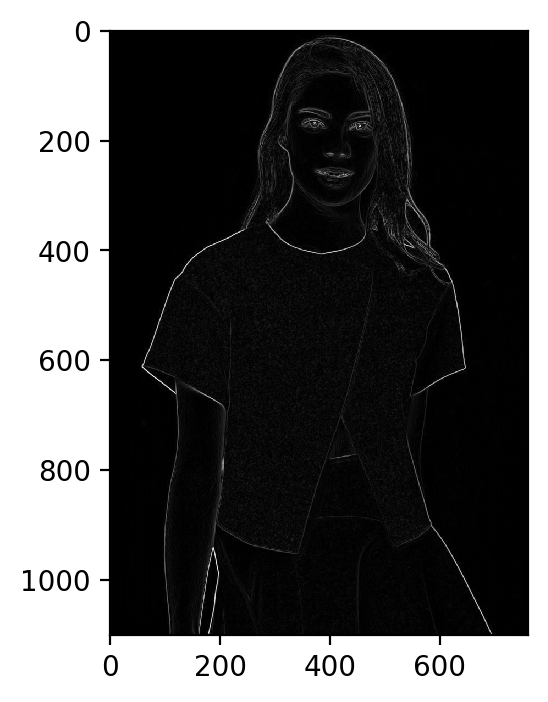

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import filters
sobel = filters.sobel(img)

plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200
plt.imshow(sobel)

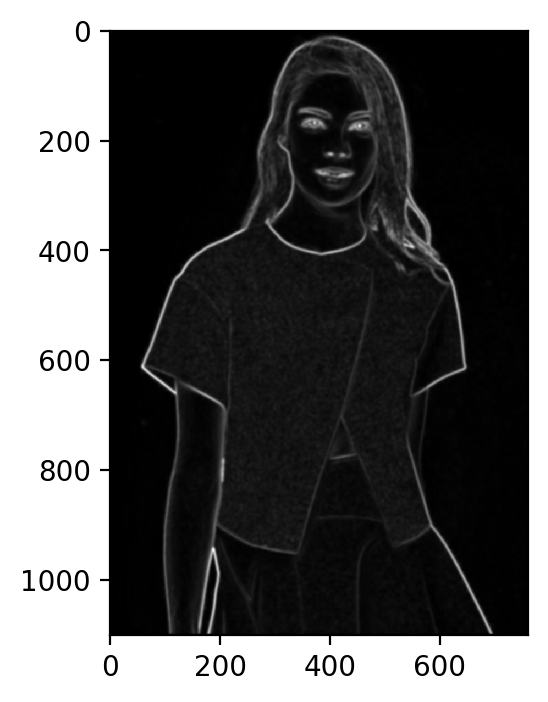

In [4]:
blurred = filters.gaussian(sobel, sigma=2.0)
plt.imshow(blurred)

### Obtaining seeds for the watershed transform
todo lo que contemple como blaco tota se le empleara el nonzero y se transversara

In [5]:
import numpy as np
light_spots = np.array((img>245).nonzero()).T
light_spots.shape

(1432, 2)

Text(0.5, 1.0, 'light spots in image')

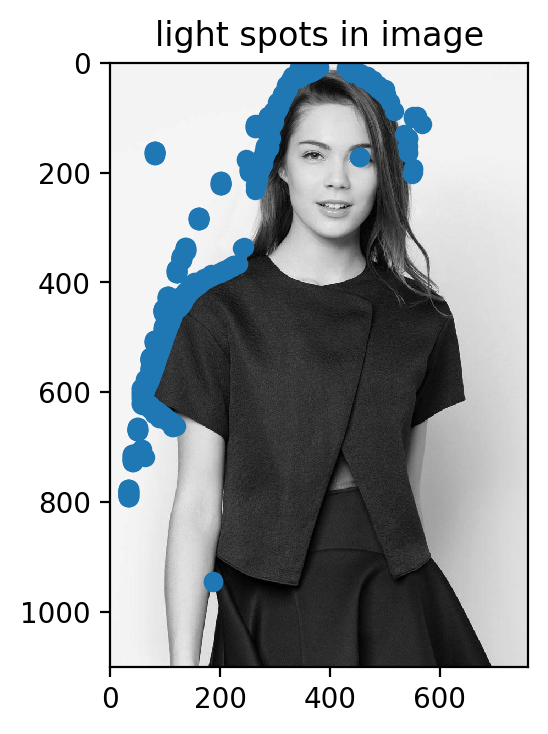

In [6]:
#pintar con O. no entiendo bien como va
plt.plot(light_spots[:,1], light_spots[:,0],'o')
plt.imshow(img)
plt.title('light spots in image')


In [7]:
dark_spots = np.array((img < 3).nonzero()).T
dark_spots.shape

(1402, 2)

Text(0.5, 1.0, 'dark spots in image')

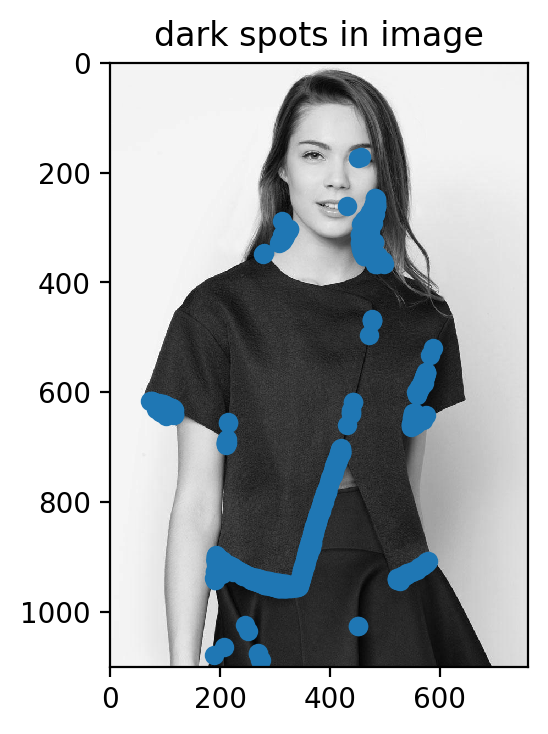

In [8]:
plt.plot(dark_spots[:,1],dark_spots[:,0],'o')
plt.imshow(img)
plt.title('dark spots in image')

## Making a seed mask
using the previous points, we can use the labelling function grom scipy.ndimage to make a seed mask

In [9]:
from scipy import ndimage as ndi
bool_mask = np.zeros(img.shape, dtype = np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
print(num_seeds)
print(seed_mask)

672
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Apply the watershed
# How did this work?

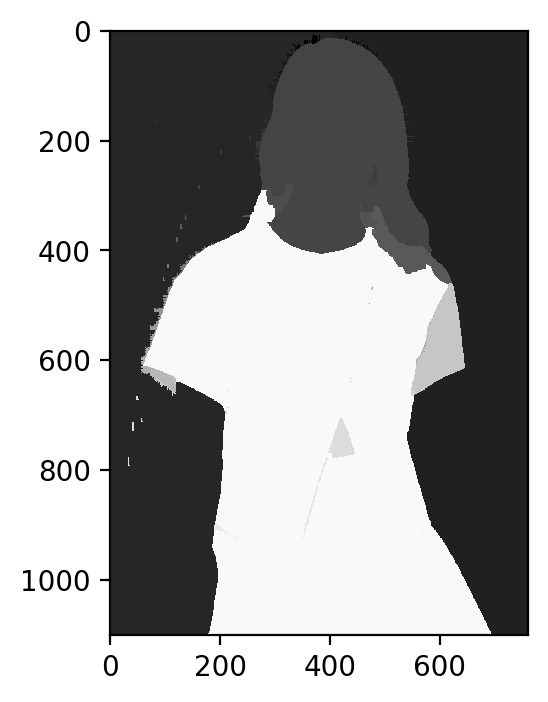

In [10]:
from skimage import morphology
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

In [11]:
background = max(set(ws.ravel()), key=lambda g : np.sum(ws ==g))
background

656

Making a mask that removes that class

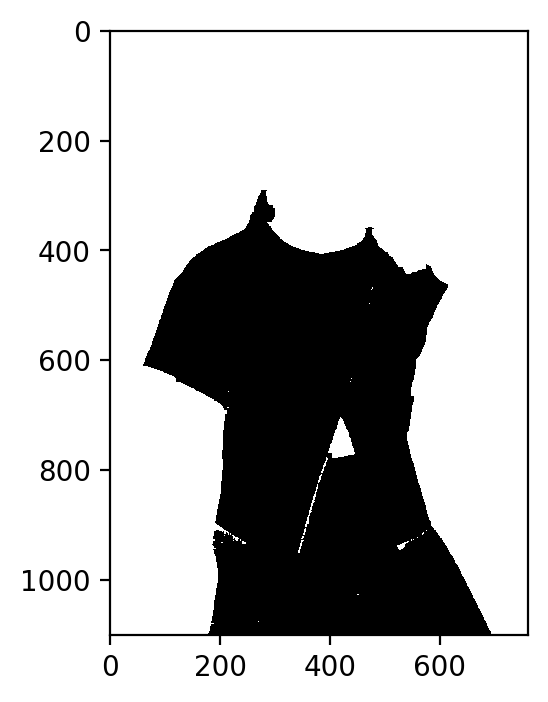

In [12]:
background_mask = (ws == background) #Get all values True where white is pressent 1
plt.imshow(~background_mask) # the "~" inverts the value, therefore the mask is inverted

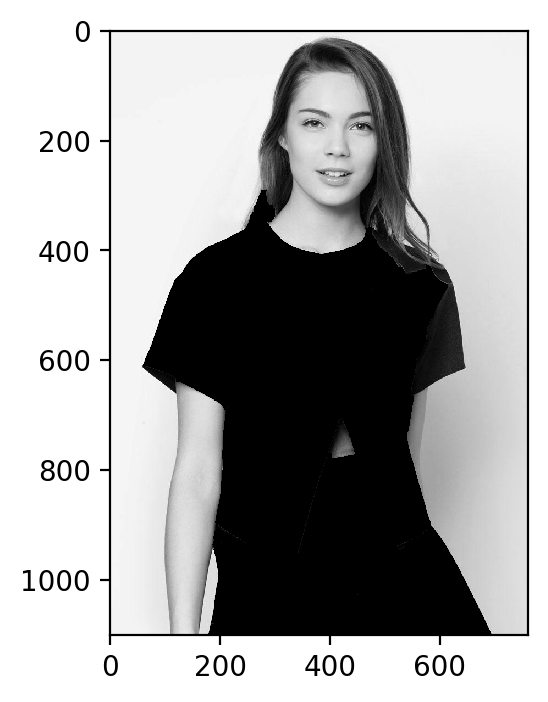

In [13]:
cleaned = img * ~background_mask
plt.imshow(cleaned)

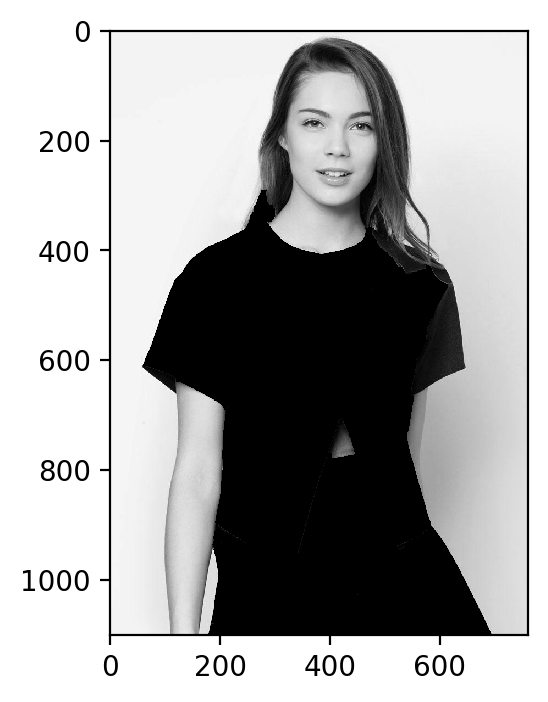

In [14]:
plt.imshow(cleaned, cmap='gray')
plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([1, 0, 0, 1]))


# El anterior debio haber salido rojo

## Pick another group

In [15]:
def draw_group_as_background(ax, group, watershed_result, original_image):
    "Draws a group from the watershed result as a red background"
    background_mask = (watershed_result == group)
    cleaned = original_image * ~background_mask
    ax.imshow(cleaned, cmap='gray')
    ax.imshow(background_mask.reshape(background_mask.shape + (1,)) *np.array([1,0,0,1]))

In [16]:
background_candidates = sorted(set(ws.ravel()), key= lambda g: np.sum(ws==g), reverse=True)

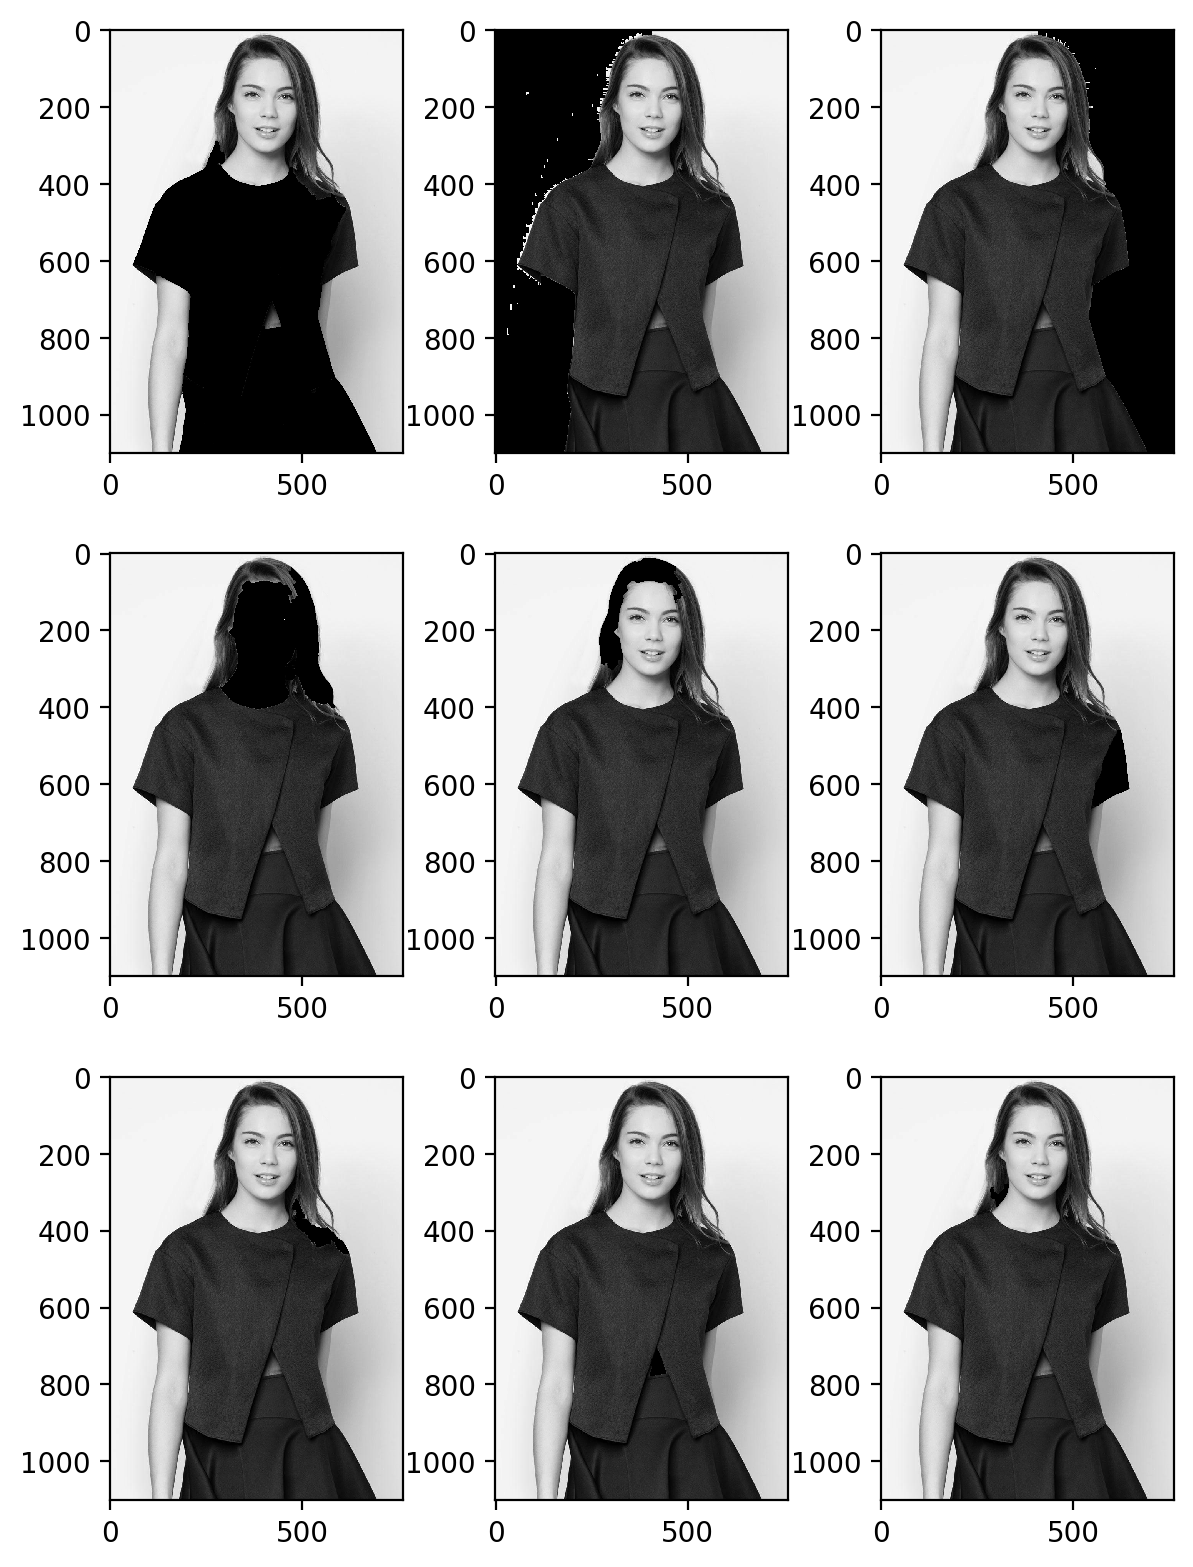

In [17]:
N = 3
fig, axes = plt.subplots(N, N, figsize=(6,8))
for i in range(N*N):
    draw_group_as_background(axes.ravel()[i], background_candidates[i],ws,img)
plt.tight_layout()
    

## manually input seeds


In [18]:
seed_mask = np.zeros(img.shape, dtype=np.int)
seed_mask[0,0] = 1 #background
seed_mask[250,500] =2 #foreground

#perform watershed again

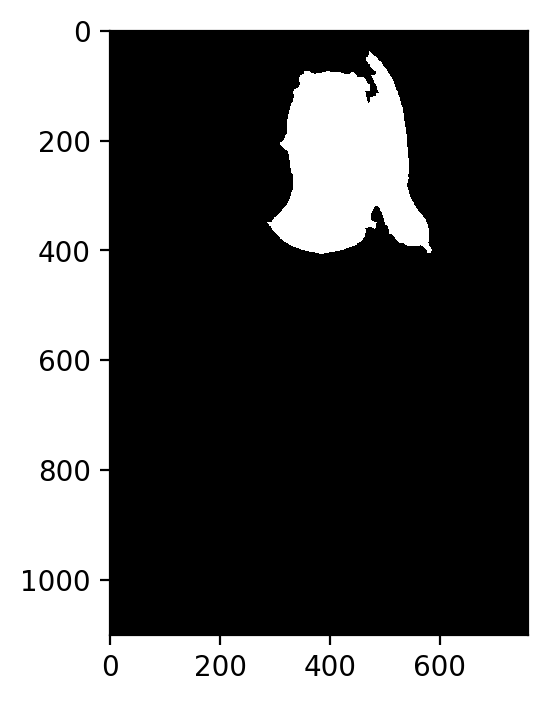

In [19]:
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

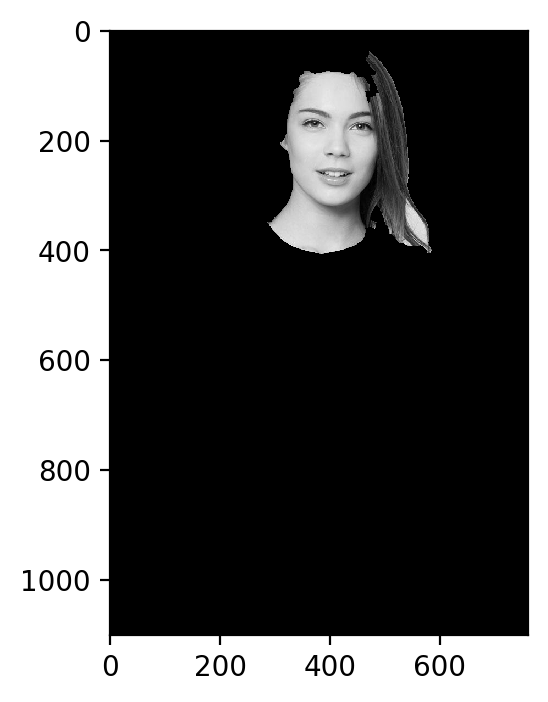

In [20]:
fig, ax = plt.subplots()
draw_group_as_background(ax, 1, ws, img)


In [21]:
seed_mask = np.zeros(img.shape, dtype=np.int)
seed_mask[0,0]=1 #background
seed_mask[250,500]=2 #foreground
seed_mask[250,400]=2 #lefft arm


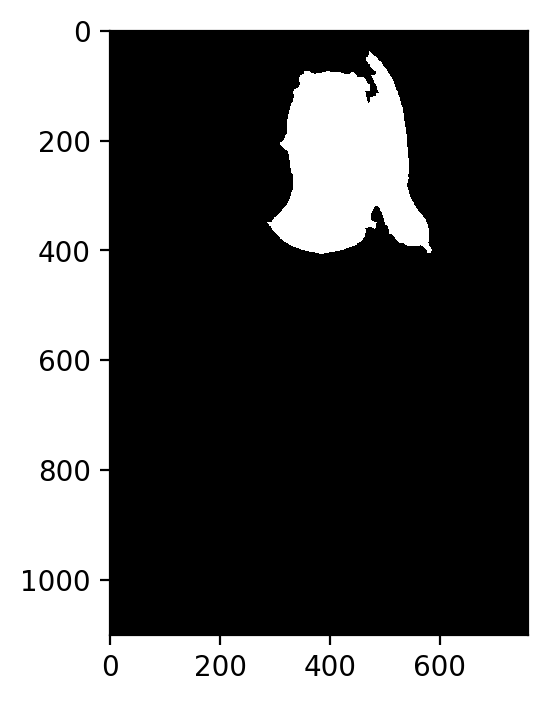

In [22]:
ws = morphology.watershed(blurred,seed_mask)
plt.imshow(ws)

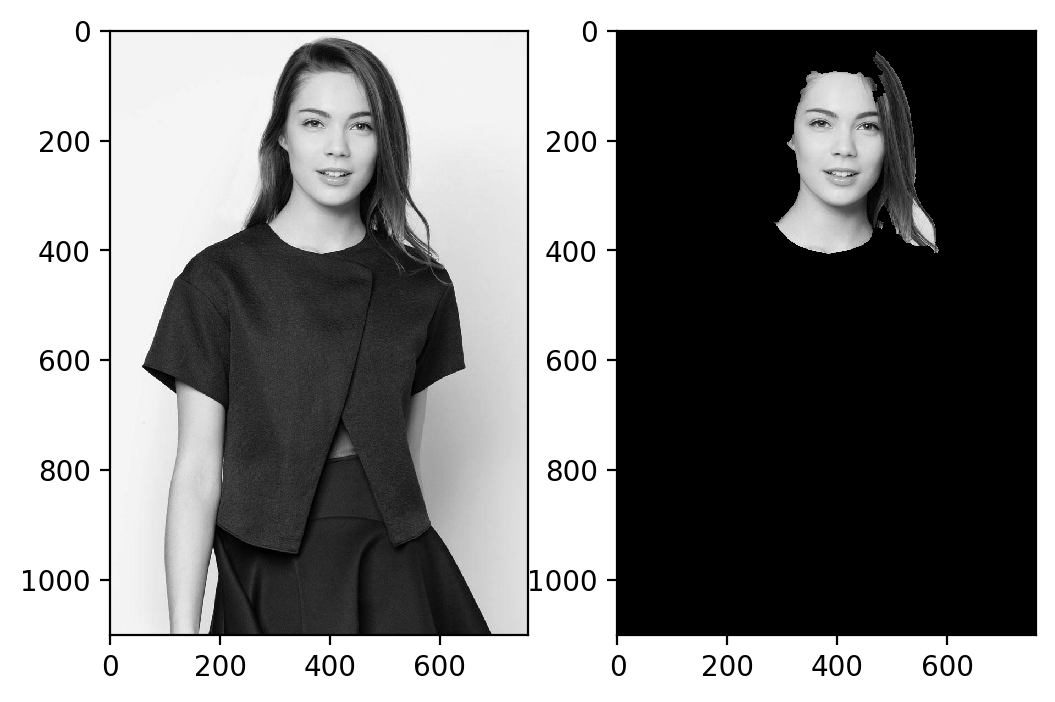

In [23]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
draw_group_as_background(ax[1],1,ws,img)